<a href="https://colab.research.google.com/github/denmj/midterm_631/blob/main/631_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import scipy.stats as stat
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.pipeline import Pipeline, make_pipeline
import pickle


In [ ]:
# Helper function to check if data has null values / missing values
# CGenerates table with % and vaues of missing values, zero values.
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
        columns={0: 'Zero Values', 1: 'Missing Values', 2: '% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
                                                                                                   "There are " + str(
        mz_table.shape[0]) +
          " columns that have missing values.")
    #         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
    return mz_table


In [ ]:
#Correlation matrix 
def corr_mat(df):
    corr = df.corr()
    ax = sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap="YlGnBu",
        square=True,
        linewidths=.5
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    plt.show()

##  Reading data

In [ ]:

file_path = '/content/bank-full.csv'
 
data_set = pd.read_csv(file_path)

In [ ]:
data_set.tail(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Apparently no null values in data set

In [ ]:
missing_zero_values_table(data_set)

Your selected dataframe has 17 columns and 45211 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


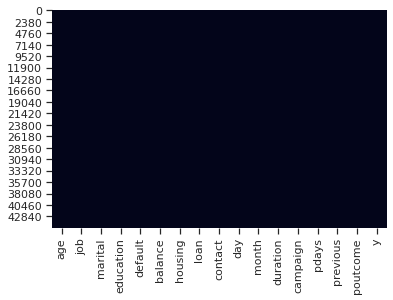

In [ ]:
# Missing values in be stacked in highlighted bar, otherwise black 
sns.heatmap(data_set.isnull(), cbar=False)
plt.show()

In [ ]:
data_set.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Some statistics about sample data 



*   Average age is 40 year old with min at 18 and max at 95 (looks fine at first glance)
*   Negative and positive balances (Normal)

* Numerical features (age, balance, day, duration(of call), campaign, pdays, previous)  -> we will plot histogram for them to see their distribution






## Visualize our data 
# plotting histograms for numerical and categorical 

In [ ]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']


In [ ]:
# Helper func to plot needed cols
def hist_plot(col_list):
  f_name = 0
  fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))
  for row in range(3): 
    for col in range(3):
      axs[row, col].hist(data_set[col_list[f_name]])
      axs[row, col].set_title(col_list[f_name])
      f_name += 1
      for sub_cat in axs[row, col].get_xticklabels():
        sub_cat.set_rotation(90)
      if f_name == len(col_list):
        break

def box_plot(col_list):
  f_name = 0
  fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))
  for row in range(3): 
    for col in range(3):
      axs[row, col].boxplot(data_set[col_list[f_name]])
      axs[row, col].set_title(col_list[f_name])
      f_name += 1
      for sub_cat in axs[row, col].get_xticklabels():
        sub_cat.set_rotation(90)
      if f_name == len(col_list):
        break


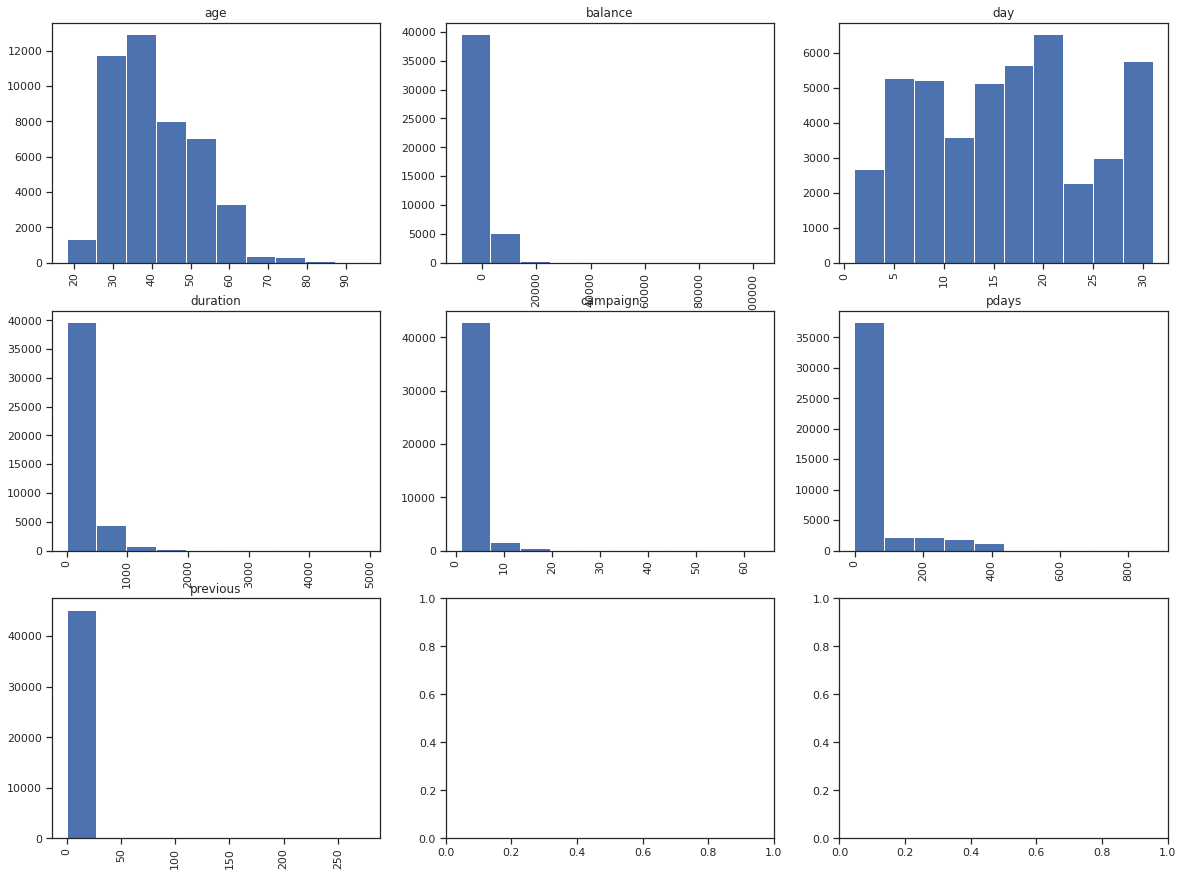

In [ ]:
hist_plot(numerical_cols)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


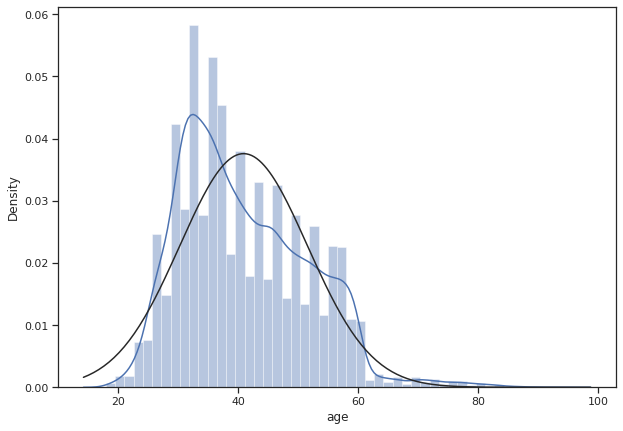

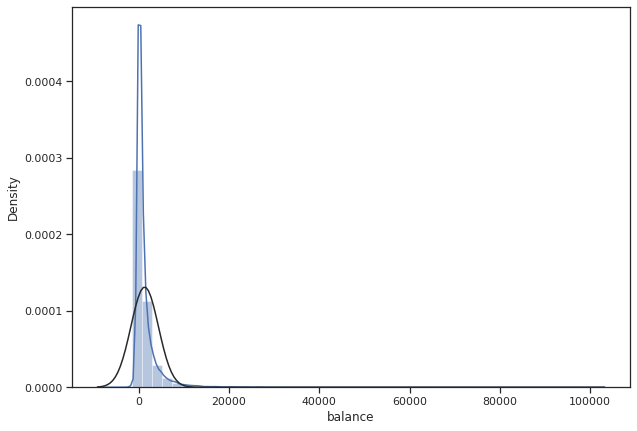

In [ ]:
# Checking most interesting features (age, balance, call duration, campaign)
plt.subplots(figsize=(10, 7))
sns.distplot(data_set['age'], fit=scipy.stats.norm)
plt.subplots(figsize=(10, 7))
sns.distplot(data_set['balance'], fit=scipy.stats.norm)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


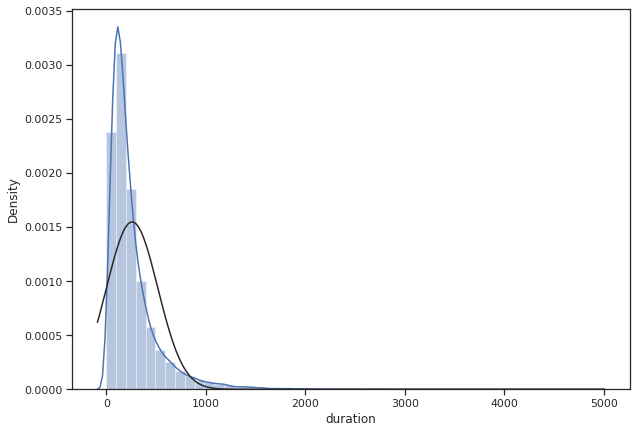

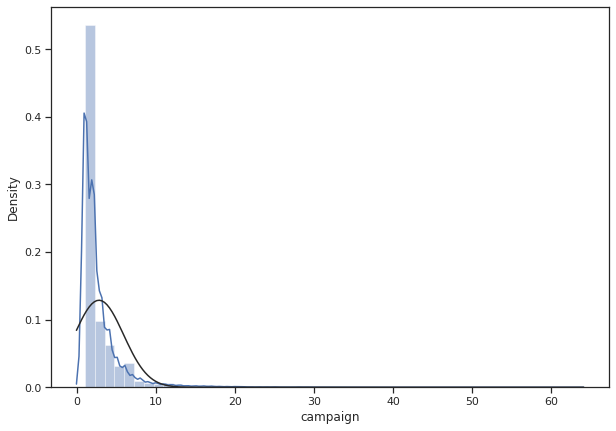

In [ ]:
plt.subplots(figsize=(10, 7))
sns.distplot(data_set['duration'], fit=scipy.stats.norm)
plt.subplots(figsize=(10, 7))
sns.distplot(data_set['campaign'], fit=scipy.stats.norm)
plt.show()

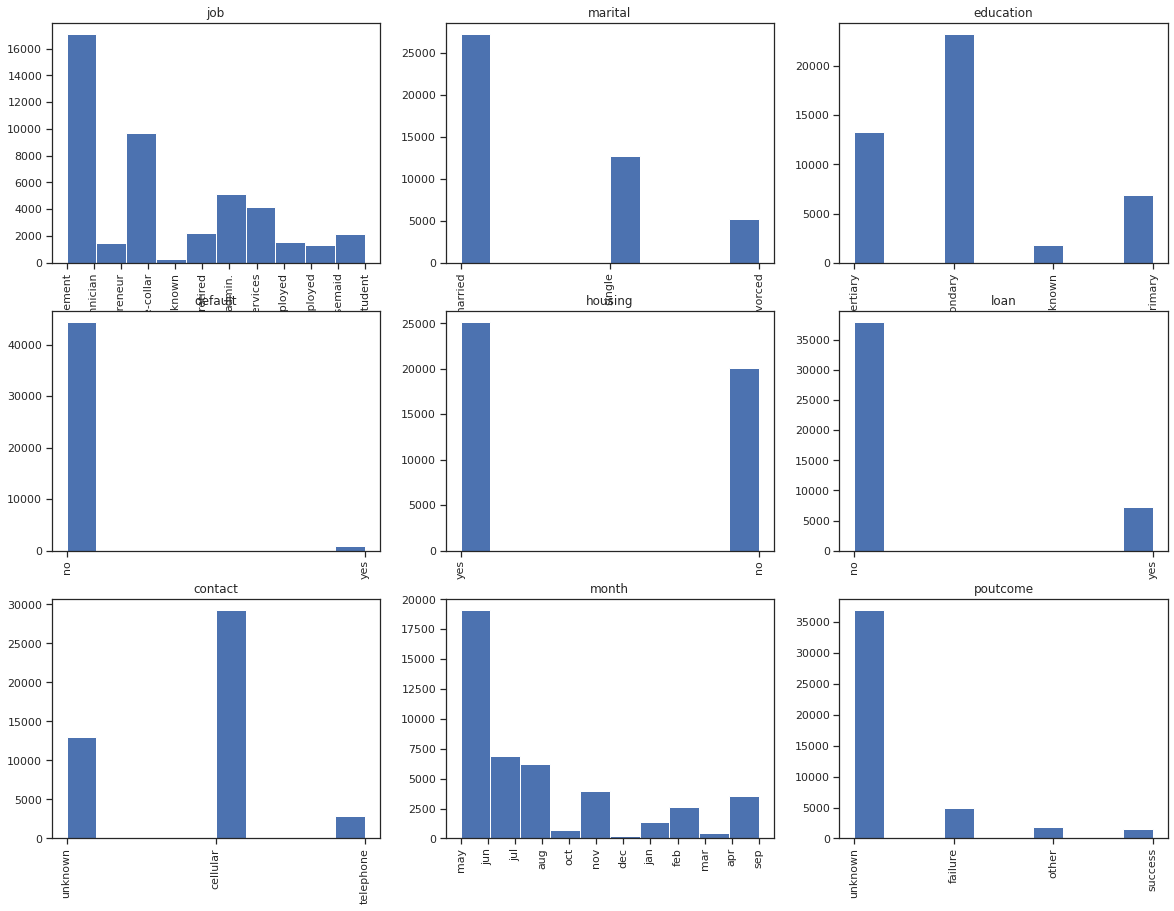

In [ ]:
hist_plot(categorical_cols)

## Lets check for outlines and do sanity check if they make sence

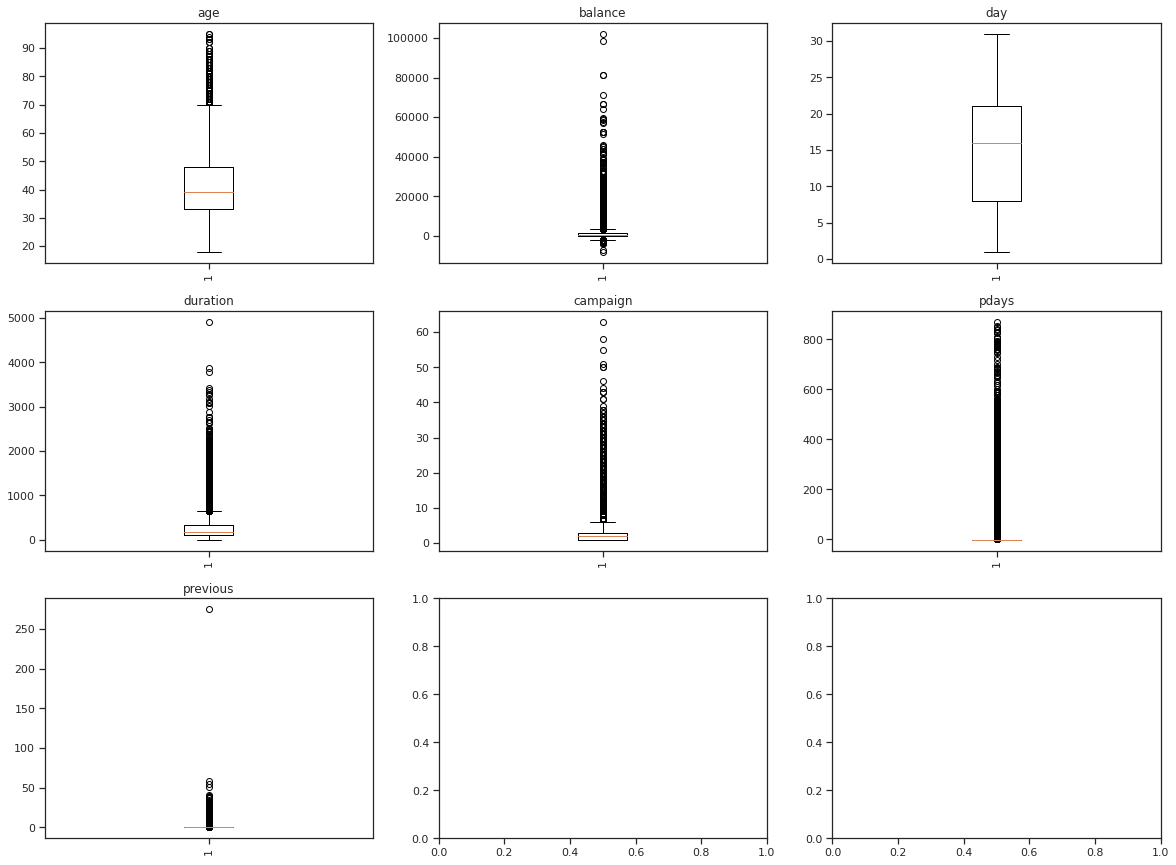

In [ ]:
#Quick check
box_plot(numerical_cols)

# We can see some people with over 90 y old, which is fine, nothing wrong with these outliers, same with balance, few people have too much money and some negative balance (but nothing extroordinary)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


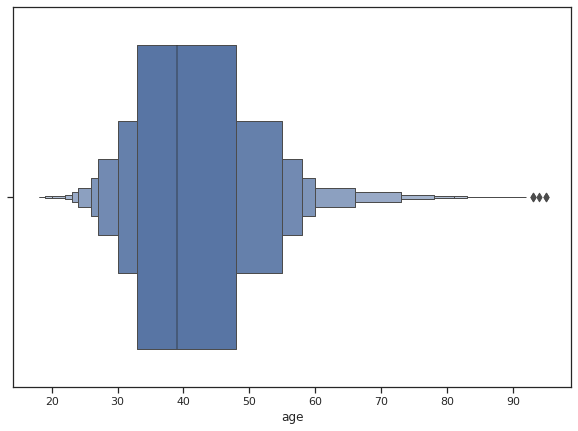

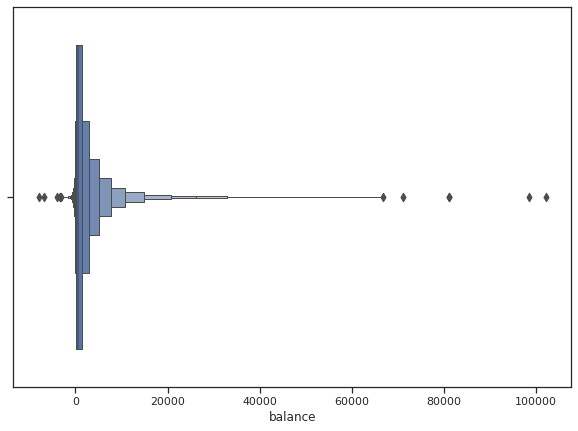

In [ ]:
plt.subplots(figsize=(10, 7))
sns.boxenplot(data_set['age'])
plt.subplots(figsize=(10, 7))
sns.boxenplot(data_set['balance'])

## Overall quick check on correlation matrix to see which pairs correlate best



> only pdays to previous with r-coef of 0.54, non above 0.6



In [ ]:
data_set.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


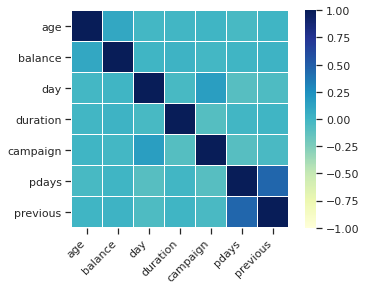

In [ ]:
corr_mat(data_set)

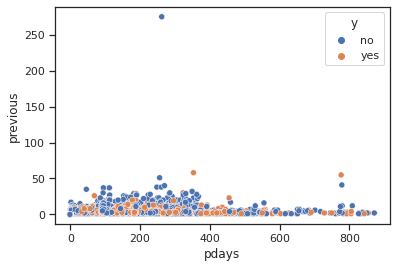

In [ ]:
# possibly outlier point above 250 days
sns.scatterplot(data=data_set, x="pdays", y="previous", hue="y")

In [ ]:
# Dropping it
data_set.drop(data_set[data_set['previous'] > 200].index, inplace = True) 


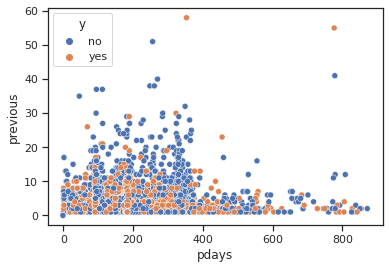

In [ ]:
sns.scatterplot(data=data_set, x="pdays", y="previous", hue="y")


## Pre processing

In [ ]:
# Lest encodes categorical predictor so we have 1 insetead of 'yes' and 0 inseatd of 'no' , also we could encode categorical features
enc = LabelEncoder()
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome', 'y']

cat_data_set = data_set[cat_cols]

In [ ]:
#Lets check categorical data set
cat_data_set

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [ ]:
cat_data_set = cat_data_set.apply(enc.fit_transform)

In [ ]:
# Now we can feed this into model
cat_data_set

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,9,3,1
45207,5,0,0,0,0,0,0,9,3,1
45208,5,1,1,0,0,0,0,9,2,1
45209,1,1,1,0,0,0,1,9,3,0


In [ ]:
#Joining with rest of data 

num_data_set = data_set[numerical_cols]

In [ ]:
data_set_encoded = num_data_set.join(cat_data_set)

In [ ]:
data_set_encoded

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3,1
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3,1
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2,1
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3,0


In [ ]:
# Suffle data set before split 
data_set_encoded = data_set_encoded.sample(frac=1)

In [ ]:
# split predictor from rest of data
data_set_encoded

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
10462,37,597,5,126,1,-1,0,0,2,1,0,1,0,0,8,3,0
27685,63,415,7,323,1,-1,0,5,1,1,0,1,0,0,10,3,0
20624,38,65,5,173,1,-1,0,2,1,1,0,0,0,0,3,3,0
40955,28,1238,14,246,1,-1,0,1,1,1,0,1,0,2,8,3,0
37419,59,88,28,63,5,-1,0,3,1,0,0,1,0,0,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,29,23,8,101,2,-1,0,9,1,1,0,1,0,0,0,3,0
4872,28,145,20,277,1,-1,0,4,2,2,0,1,0,0,0,3,0
26371,35,0,18,17,1,-1,0,0,1,1,1,1,1,0,9,3,0
30820,52,2904,15,201,6,272,3,7,1,1,0,1,0,0,0,0,0


In [ ]:
data_set_y = data_set_encoded['y']


In [ ]:
data_set_x = data_set_encoded.drop(columns='y')

In [ ]:
data_set_y.shape , data_set_x.shape

((45210,), (45210, 16))

In [ ]:
# Splitting data set into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(
...     data_set_x, data_set_y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30290, 16), (14920, 16), (30290,), (14920,))

## Build models 

In [ ]:
#Pipeline for each model 
#Normalazing data before feeding to clfs 
#WE can use Standard scaler for KNN and Logistic but it wont work with Naive because we have negative values in dataset
# for Naive we could scale by minmax (0, 1) 

knn_clf_ppline = make_pipeline(StandardScaler(), KNeighborsClassifier())
naive_clf_ppline = make_pipeline(MinMaxScaler(), CategoricalNB())
log_reg_clf_ppline = make_pipeline(StandardScaler(), LogisticRegression())

In [ ]:
#List of hyperparameters for KNN 

# leafs (not using as it just takes too long to model in colab)
kneighborsclassifier__leaf_size = np.linspace(1, 50, num=5)
# neighbors
kneighborsclassifier__n_neighbors = list(range(1,11))
# power parameter (if 1 its a minkowski distance if 2 its a euclidean )
kneighborsclassifier__p = [1,2]

In [ ]:
#List of hyperparameters for Naive B 

#Smoothing parameter 
categoricalnb__alpha = list(np.linspace(0.1, 3, num=30))

In [ ]:
#List of hyperparameters for Log Reg  
# l1 or l2 regularization, elasticnet uses both l1 and l2, also elastic net requirest to use 'saga' optimizer only :(  
logisticregression__penalty = ['l1' , 'l2'] 
# regularization multoplier 
logisticregression__C = list(range(1, 10))

logisticregression__solver = ['saga']



In [ ]:

#Convert to dictionary, will be feeded to hyperparameter tuner 
knn_hparams = dict(kneighborsclassifier__n_neighbors=kneighborsclassifier__n_neighbors,
                   kneighborsclassifier__p=kneighborsclassifier__p)
naive_hparams = dict(categoricalnb__alpha=categoricalnb__alpha)
logreg_hparams = dict(logisticregression__penalty=logisticregression__penalty,
                      logisticregression__C= logisticregression__C,
                      logisticregression__solver= logisticregression__solver)

###KNN

In [ ]:
grid_search_knn = GridSearchCV(knn_clf_ppline, knn_hparams, scoring='accuracy', cv=10)

In [ ]:
grid_search_knn.fit(X_train, y_train)
print("Best hyperparams: {} ".format(grid_search_knn.best_params_))

Best hyperparams: {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 1} 


In [ ]:
filename = 'knn_model.sav'
pickle.dump(grid_search_knn, open(filename, 'wb'))

### Logistic Regression

In [ ]:
grid_search_lreg_clf = GridSearchCV(log_reg_clf_ppline, logreg_hparams, scoring='accuracy', cv=10)

In [ ]:
grid_search_lreg_clf.fit(X_train, y_train)
print("Best hyperparams: {} ".format(grid_search_lreg_clf.best_params_))

Best hyperparams: {'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'} 


In [ ]:
filename = 'logistic_regression_model.sav'
pickle.dump(grid_search_lreg_clf, open(filename, 'wb'))

### Naive Bayes  

In [ ]:
grid_search_naiveb_clf = GridSearchCV(naive_clf_ppline, naive_hparams, scoring='accuracy', cv=10)

In [ ]:
grid_search_naiveb_clf.fit(X_train, y_train)
print("Best hyperparams: {} ".format(grid_search_naiveb_clf.best_params_))

Best hyperparams: {'categoricalnb__alpha': 1.5} 


In [ ]:
filename = 'naive_b_model.sav'
pickle.dump(grid_search_naiveb_clf, open(filename, 'wb'))

### Results of all 3 models 

In [ ]:
print('Train Set Accuracy for KNN:   {0:.1f}%'.format(grid_search_knn.score(X_train, y_train)*100))
print('Test Set Accuracy for KNN:    {0:.1f}%'.format(grid_search_knn.score(X_test, y_test)*100))
print('Train Set Accuracy for Logistic Regression:   {0:.1f}%'.format(grid_search_lreg_clf.score(X_train, y_train)*100))
print('Test Accuracy for Logistic Regression:    {0:.1f}%'.format(grid_search_lreg_clf.score(X_test, y_test)*100))
print('Train Set Accuracy for Naive B:   {0:.1f}%'.format(grid_search_naiveb_clf.score(X_train, y_train)*100))
print('Test Accuracy for Naive B:    {0:.1f}%'.format(grid_search_naiveb_clf.score(X_test, y_test)*100))

Train Set Accuracy for KNN:   91.3%
Test Set Accuracy for KNN:    89.9%
Train Set Accuracy for Logistic Regression:   89.1%
Test Accuracy for Logistic Regression:    89.2%
Train Set Accuracy for Naive B:   88.3%
Test Accuracy for Naive B:    88.2%


### Loading models 

In [ ]:
# I would recommend to load model (as KNN might take too long to train)
# Below some steps on how to load it
# load models from folder to colabs root folder 
# Uncomment needed line witj model name and load


In [ ]:
# filename_logreg = 'logistic_regression_model.sav'
# filename_knn = 'knn__model.sav'
# filename_naive = 'naive_b_model.sav'

load_m = pickle.load(open(filename_logreg, 'rb'))
result = load_m.score(X_test, y_test)
print(result)